In [1]:
FLUID = "Water"
NUM_POINTS =  300
COLORMAP = 'nipy_spectral'
%matplotlib inline

In [3]:
import CoolProp
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.ticker
import numpy as np
import pandas as pd


In [4]:
print("**************** SYSINFO ***************")
print("CoolProp version:", CP.get_global_param_string("version"))
print("CoolProp Fluids:", CP.get_global_param_string("FluidsList"))


**************** SYSINFO ***************
CoolProp version: 6.1.0
CoolProp Fluids: 1-Butene,Acetone,Air,Ammonia,Argon,Benzene,CarbonDioxide,CarbonMonoxide,CarbonylSulfide,cis-2-Butene,CycloHexane,Cyclopentane,CycloPropane,D4,D5,D6,Deuterium,Dichloroethane,DiethylEther,DimethylCarbonate,DimethylEther,Ethane,Ethanol,EthylBenzene,Ethylene,EthyleneOxide,Fluorine,HeavyWater,Helium,HFE143m,Hydrogen,HydrogenChloride,HydrogenSulfide,IsoButane,IsoButene,Isohexane,Isopentane,Krypton,m-Xylene,MD2M,MD3M,MD4M,MDM,Methane,Methanol,MethylLinoleate,MethylLinolenate,MethylOleate,MethylPalmitate,MethylStearate,MM,n-Butane,n-Decane,n-Dodecane,n-Heptane,n-Hexane,n-Nonane,n-Octane,n-Pentane,n-Propane,n-Undecane,Neon,Neopentane,Nitrogen,NitrousOxide,Novec649,o-Xylene,OrthoDeuterium,OrthoHydrogen,Oxygen,p-Xylene,ParaDeuterium,ParaHydrogen,Propylene,Propyne,R11,R113,R114,R115,R116,R12,R123,R1233zd(E),R1234yf,R1234ze(E),R1234ze(Z),R124,R125,R13,R134a,R13I1,R14,R141b,R142b,R143a,R152A,R161,R21,R218,R22,R227EA,R2

In [5]:
T = np.linspace(CP.PropsSI(FLUID, "TMIN") + 0.1,
                CP.PropsSI(FLUID, "TMAX") - 0.1, NUM_POINTS)
P = np.linspace(CP.PropsSI(FLUID, "PMIN") + 1000,
                CP.PropsSI(FLUID, "PMAX") - 1000, NUM_POINTS)


# S = CP.PropsSI("S", "T", T, "P", P, FLUID)

data = []

for t in T:
    for p in P:
        data.append([t, p * (10**-5) / 1000,
                     CP.PropsSI("S", "T", t, "P", p, FLUID)])
rawdata = np.asarray(data)
newdata = []
for i, s in enumerate(rawdata[:, 2]):
    if s > 0 and rawdata[i, 1] >= 10**-2 and rawdata[i, 0] > 0:
        newdata.append([rawdata[i, 0], rawdata[i, 1], rawdata[i, 2]])

# newdata = np.asarray(newdata)
frame = pd.DataFrame(newdata, columns=["T", "P", "S"])

In [6]:
frame.head(4)

,T,P,S
0,273.26,0.033461,1.744377
1,273.26,0.066906,1.902018
2,273.26,0.100350,2.018568
3,273.26,0.133795,2.095082


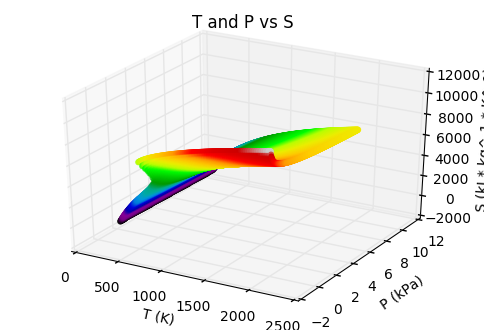

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(frame['T'],frame['P'],frame['S'], c=frame['S'],cmap=COLORMAP, edgecolors='none')
# for T, V, S in zip(frame['T'],frame['P'], frame['S']):
#     ax.scatter(T, V, S)

ax.set_xlabel("T (K)")
ax.set_ylabel("P (kPa)")
ax.set_zlabel("S (kJ * kg^-1 * K^-1)")
ax.set_title("T and P vs S")
plt.show()

In [ ]:
frame.to_csv("../data/TPS.csv")

In [10]:
frame.shape

(88980, 3)